<a href="https://colab.research.google.com/github/JulverRMP/Sales-Predictions-Food/blob/main/Proyecto_1_Parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El primer proyecto será una predicción de ventas para productos alimenticios que se venden en distintas tiendas. El objetivo es ayudar a la tienda a comprender las propiedades de los productos y establecimientos que tienen un rol crucial en aumentar las ventas.

Para la Parte 3, tu tarea es construir varias visualizaciones de datos que te ayuden a entender mejor los datos y que ayuden a las partes interesadas a entender mejor las tendencias en los datos. Siéntete libre de dejarte llevar por tu creatividad esta semana, esta es tu oportunidad de establecer tu proyecto a parte de otros con análisis y visualizaciones excepcionales.

* Usa los datos que limpiaste la semana pasada. Si es necesario, puedes descargar los datos oiriginales. (Nota: Original data source)(https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

* Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando (análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Tenen cuenta que es probable que el nombre del archivo sea diferente en tu computadora (especialmente más adelante en el curso)
filename = '/content/drive/MyDrive/BOOTCAMP-DATA ANALYTICS/SEMANA02/sales_predictions.csv'
df = pd.read_csv(filename)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


* Explora los datos: ¿Qué necesitas para limpiar estos datos?





verificar los tipos de datos, si hay datos nulos, datos erroneos, datos repetidos, realizar iputaciones de acuerdo a la verificación previo.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Según el método .info, se obtiene que las columnas donde tienen datos faltantes son: 'Item_Weight' , 'Outlet_Size'

In [6]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

¿Hay valores faltantes en el conjunto de datos? Es posible que algunas tiendas no informen de todos los datos a causa de problemas técnicos u otros problemas. De ser así, trata con ello apropiadamente.

Verificando la informmación se observa que faltan datos en la columna 'Outlet_Size', por lo cual se identifica a que tiendas les falta dicho dato.

In [7]:
size_missing = df['Outlet_Size'].isna()
# Mira las filas que contienen NaN para size_missing
df.loc[size_missing,'Outlet_Identifier'].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

Luego se observa que existe una relación entre el tipo de centro comercial, el tipo de area donde se ubica la tienda y el identificador de tienda y además las tiendas que no tienen una clasificación de tamaño son: OUT045, OUT017 y OUT010.

In [8]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Identifier'])[['Item_Identifier']].count()

Item_Identifier
Outlet_Type       Outlet_Location_Type Outlet_Identifier                 
Grocery Store     Tier 1               OUT019                         528
                  Tier 3               OUT010                         555
Supermarket Type1 Tier 1               OUT046                         930
                                       OUT049                         930
                  Tier 2               OUT017                         926
                                       OUT035                         930
                                       OUT045                         929
                  Tier 3               OUT013                         932
Supermarket Type2 Tier 3               OUT018                         928
Supermarket Type3 Tier 3               OUT027                         935

Por lo cual se procede a realizar un agrupamiento  según todas las categorias anteriores , añadiendo la coluna 'Outlet_Size' y relizando la suma de todas las ventas de las tiendas.

In [9]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Identifier','Outlet_Size'])[['Item_Outlet_Sales']].sum()

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Identifier Outlet_Size                   
Grocery Store     Tier 1               OUT019            Small             1.796941e+05
Supermarket Type1 Tier 1               OUT046            Small             2.118395e+06
                                       OUT049            Medium            2.183970e+06
                  Tier 2               OUT035            Small             2.268123e+06
                  Tier 3               OUT013            High              2.142664e+06
Supermarket Type2 Tier 3               OUT018            Medium            1.851823e+06
Supermarket Type3 Tier 3               OUT027            Medium            3.453926e+06

En la tabla anterior no se muestran las tiendas que no tienen clasificación en la columna 'Outlet_Size', por lo que procede a realizar la misma agrupación pero sin considerar la columna 'Outlet_Size' para poder saber las ventas totales de cada tienda y comparar con la tabla anterior para asi poder clasificar las tiendas faltantes.

In [10]:
df.groupby(['Outlet_Type', 'Outlet_Location_Type', 'Outlet_Identifier'])[['Item_Outlet_Sales']].sum()

Item_Outlet_Sales
Outlet_Type       Outlet_Location_Type Outlet_Identifier                   
Grocery Store     Tier 1               OUT019                  1.796941e+05
                  Tier 3               OUT010                  1.883402e+05
Supermarket Type1 Tier 1               OUT046                  2.118395e+06
                                       OUT049                  2.183970e+06
                  Tier 2               OUT017                  2.167465e+06
                                       OUT035                  2.268123e+06
                                       OUT045                  2.036725e+06
                  Tier 3               OUT013                  2.142664e+06
Supermarket Type2 Tier 3               OUT018                  1.851823e+06
Supermarket Type3 Tier 3               OUT027                  3.453926e+06

Por lo cual se puede con cluir que las tiendas faltantes de clasificar tendrian la siguiente clasificación:

Esta tienda pertenece a la categoria "Grocery Store" y su venta es mayor a la tienda OUT019 que tiene una clasificación de small, por lo cual se clasificara con Medium.
* OUT010  : Medium

Las tiendas pertenecen a la categoria Supermarket Type1, tipo de área dnde se ubican (Tier 2) y además los valores de ventas son menores al de la tienda OUT035 el cual tiene una categoria de Small, por lo tanto lo cual las tiendas se clasificara con la categoria de Small.
* OUT045  :  Small

* OUT017  :  Small


In [11]:
out010_filter=df['Outlet_Identifier'] == 'OUT010'
df.loc[out010_filter, 'Outlet_Size']=df.loc[out010_filter, 'Outlet_Size'].fillna('Medium')

In [12]:
out017_filter=df['Outlet_Identifier'] == 'OUT017'
out045_filter=df['Outlet_Identifier'] == 'OUT045'
df.loc[(out017_filter | out045_filter), 'Outlet_Size']=df.loc[(out017_filter | out045_filter), 'Outlet_Size'].fillna('Small')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


S verifica las variables en la columna 'Item_Fat_Content'

In [14]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Se regulariza los valores a solo Low Fat y Regular

In [15]:
df["Item_Fat_Content"].replace("LF", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("low fat", "Low Fat", inplace=True)
df["Item_Fat_Content"].replace("reg", "Regular", inplace=True)
df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Luego se agrupa la identificación de cada producto , la columna de pesos y se realia el conteo para ver cuantos producto hay que no sean repetidos


In [16]:
df.groupby(['Item_Identifier', 'Item_Weight'])[['Item_Weight']].count()

,,Item_Weight
Item_Identifier,Item_Weight,
DRA12,11.600,6
DRA24,19.350,5
DRA59,8.270,6
DRB01,7.390,2
DRB13,6.115,5
...,...,...
NCZ30,6.590,6
NCZ41,19.850,5
NCZ42,10.500,5


Segun la tabla anterior se obtienen 1555 datos, sin considerar los datos de producto unico, no se repiten en otra tienda, además no tienen ingresado el peso.

Luego se realiza un conteo de valores en la columna 'Item_Identifier' donde si se consideran los productos qu no tiene ingresado el peso en la tabla de datos.

In [17]:
df['Item_Identifier'].value_counts().reset_index()

,index,Item_Identifier
0,FDW13,10
1,FDG33,10
2,NCY18,9
3,FDD38,9
4,DRE49,9
...,...,...
1554,FDY43,1
1555,FDQ60,1
1556,FDO33,1
1557,DRF48,1


Por lo tanto en la última tabla se obtienen 1559 filas, es decir 1559; pero en la tabla anterior donde se consideraban los productos con datos de peso ingresado se obtuvo 1555 productos; por lo tanto se puede llegar a la conclusión de que existen 4 productos que no fueron ingresados sus pesos en la columna 'Item_Weight' y que no existen los mismos productos en otras tiendas, es decir son productos unicos.

Se procede a hacer una lista de los productos en mención

In [18]:
lisn1=[]
for x in df['Item_Identifier'].unique():
  lisn1.append(x)
print(lisn1)

['FDA15', 'DRC01', 'FDN15', 'FDX07', 'NCD19', 'FDP36', 'FDO10', 'FDP10', 'FDH17', 'FDU28', 'FDY07', 'FDA03', 'FDX32', 'FDS46', 'FDF32', 'FDP49', 'NCB42', 'DRI11', 'FDU02', 'FDN22', 'FDW12', 'NCB30', 'FDC37', 'FDR28', 'NCD06', 'FDV10', 'DRJ59', 'FDE51', 'FDC14', 'FDV38', 'NCS17', 'FDP33', 'FDO23', 'DRH01', 'NCX29', 'FDV20', 'DRZ11', 'FDX10', 'FDB34', 'FDK43', 'FDA46', 'FDC02', 'FDL50', 'FDM39', 'NCP05', 'FDV49', 'FDL12', 'FDS02', 'NCL17', 'FDM40', 'FDR13', 'FDA43', 'NCP18', 'FDK21', 'NCX54', 'DRK35', 'FDY21', 'FDI26', 'FDM20', 'FDV27', 'FDF09', 'FDY40', 'FDY45', 'FDC46', 'FDH19', 'FDZ03', 'DRH37', 'NCI17', 'FDJ58', 'FDH35', 'FDG02', 'NCZ18', 'FDC29', 'FDQ10', 'FDN48', 'FDL04', 'FDV25', 'FDD58', 'FDN04', 'FDV45', 'NCL18', 'FDR12', 'FDG20', 'FDZ55', 'FDQ49', 'FDN33', 'FDN27', 'FDW20', 'DRG27', 'DRI25', 'FDA44', 'NCR17', 'FDU04', 'FDF41', 'FDB56', 'FDT28', 'FDD10', 'FDW57', 'DRB48', 'FDP09', 'FDH14', 'FDA47', 'FDG12', 'DRE60', 'DRK49', 'FDD03', 'FDS52', 'FDW39', 'FDX34', 'FDV11', 'FDD17', 

In [19]:
id_filter=df['Item_Identifier'] == 'FDO60'
df.loc[id_filter]['Item_Weight']

1653    20.0
2897    20.0
5175    20.0
6085    20.0
6266    20.0
6277    20.0
7534     NaN
Name: Item_Weight, dtype: float64

In [20]:
id_filter=df['Item_Identifier'] == 'FDO60'
df.loc[id_filter, 'Item_Weight']

1653    20.0
2897    20.0
5175    20.0
6085    20.0
6266    20.0
6277    20.0
7534     NaN
Name: Item_Weight, dtype: float64

In [21]:
df.loc[id_filter]['Item_Weight'].max()

20.0

Luego se ingresan los datos faltantes a los productos que cuentan con un peso determinado, el cual fue ingresado en algunas tiendas, pero en otras por lo cual se encuentra vacio en la columna 'Item_Weight'.

Se realiza un barrido a la lista de productos creada, luego se filtra cada producto en el dataframe, para luego localizazr las filas con el mismo producto y si cuenta con algunas filas NaN se ingresa el valor de la otra fila que si cuente el peso para el mismo producto; pero si el producto es unico lo deja en vacio.

In [22]:
for x in lisn1:
  id_filter=df['Item_Identifier'] == x
  m=df.loc[id_filter]['Item_Weight'].max()
  df.loc[id_filter,'Item_Weight']=df.loc[id_filter]['Item_Weight'].fillna(m)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [24]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Luego de rellenar los valores faltantes según el criterio mencionado anteriorente nos quedarian solo 4 filas con valores nulos ya que estos productos son unicos.

Se verifica si hay datos duplicados con el método duplicate

In [25]:
df.duplicated().sum()

0

In [26]:
tabla_nan=df[df['Item_Weight'].isna()]
tabla_nan

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


Según la tala anterior hay 4 productos que no ha sido reemplazado el valor NaN en la tabla, debido a que son productos unicos y no hay dato similar para ingresar, ademas dichos productos pertenecen a diferente tipo de artículo.

Por lo tanto se procede a rellenar los valores vacios con la media de los productos, clasificandolo según el tipo de artículo.

In [27]:
lisn2=list(tabla_nan['Item_Type'])
lisn2

['Frozen Foods', 'Snack Foods', 'Dairy', 'Baking Goods']

In [28]:
for x in lisn2:
  type_filter=df['Item_Type'] == x
  mean=df.loc[type_filter]['Item_Weight'].mean()
  df.loc[type_filter,'Item_Weight']=df.loc[type_filter]['Item_Weight'].fillna(mean)

Se verifica que no hay valores NaN en la ase de datos.

In [29]:
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


¿Cuáles son algunos resúmenes estadísticos, información agregada, u otras tendencias que puedes observar en los datos usando Pandas?

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,8523.0,12.875418,4.645016,4.555,8.785000,12.650000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


# Procesamiento de Data y visualización

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [100]:
df_venta_total=df.groupby(['Outlet_Identifier'])[['Item_Outlet_Sales']].sum().round(2).sort_values(by='Item_Outlet_Sales').reset_index()
df_venta_total

,Outlet_Identifier,Item_Outlet_Sales
0,OUT019,179694.09
1,OUT010,188340.17
2,OUT018,1851822.83
3,OUT045,2036725.48
4,OUT046,2118395.17
5,OUT013,2142663.58
6,OUT017,2167465.29
7,OUT049,2183969.81
8,OUT035,2268122.94
9,OUT027,3453926.05


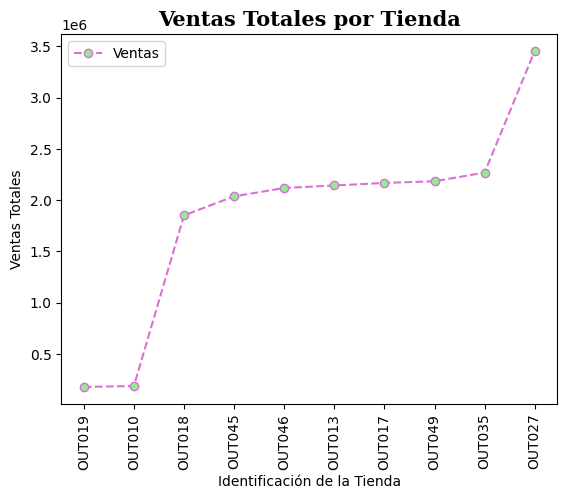

In [134]:
fig_2=plt.figure(dpi=100)
ax2=fig_2.add_subplot(1,1,1)
ax2.set_title("Ventas Totales por Tienda",ha='center', size=15, fontweight="black",fontfamily="serif")
ax2.plot(df_venta_total["Outlet_Identifier"],df_venta_total["Item_Outlet_Sales"], 'o--', color="orchid", markerfacecolor="lightgreen",label='Ventas')
ax2.set_xlabel("Identificación de la Tienda")
ax2.set_ylabel("Ventas Totales")

plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.show()

In [106]:
df_fat=df.groupby(['Item_Type','Item_Fat_Content'])['Outlet_Identifier'].count().unstack().sort_values(by='Low Fat')
df_fat

Item_Fat_Content,Low Fat,Regular
Item_Type,,
Seafood,37.0,27.0
Breakfast,41.0,69.0
Starchy Foods,82.0,66.0
Breads,140.0,111.0
Others,169.0,NaN
Meat,170.0,255.0
Hard Drinks,214.0,NaN
Baking Goods,329.0,319.0
Canned,341.0,308.0


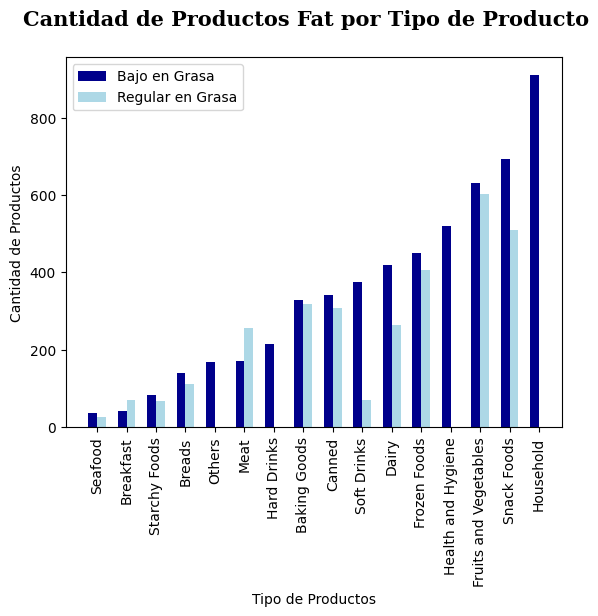

In [131]:
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(111)

x = df_fat.index
co=np.arange(len(x))

ya = df_fat['Low Fat'].values
yb = df_fat['Regular'].values

sep = 0.3
ax1.bar(co-sep/2, ya, sep, color='darkblue',label='Bajo en Grasa')
ax1.bar(co+sep/2, yb,sep, color='lightblue',label='Regular en Grasa')
ax1.set_xticks(co)

plt.xticks(rotation = 90)
ax1.set_xticklabels(x)

ax1.set_xlabel('Tipo de Productos')
ax1.set_ylabel('Cantidad de Productos')
plt.suptitle("Cantidad de Productos Fat por Tipo de Producto",ha='center', size=15, fontweight="black",fontfamily="serif")
plt.legend(loc='upper left')

plt.show()

In [97]:
df_max=df.groupby(['Outlet_Type','Outlet_Identifier'])['Item_Outlet_Sales'].max().reset_index()

In [98]:
df_filter=df.loc[df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].idxmax()]

In [89]:
df_mayor=df_filter[['Outlet_Type','Outlet_Identifier','Item_Type','Item_Outlet_Sales']]
df_mayor

,Outlet_Type,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7759,Grocery Store,OUT010,Household,1775.6886
4888,Supermarket Type1,OUT013,Dairy,10256.6490
4961,Supermarket Type1,OUT017,Dairy,9664.7528
43,Supermarket Type2,OUT018,Canned,6768.5228
8353,Grocery Store,OUT019,Health and Hygiene,1482.0708
7188,Supermarket Type3,OUT027,Household,13086.9648
5752,Supermarket Type1,OUT035,Dairy,8479.6288
8039,Supermarket Type1,OUT045,Fruits and Vegetables,8994.9580
4289,Supermarket Type1,OUT046,Health and Hygiene,9779.9362
1506,Supermarket Type1,OUT049,Dairy,7646.0472


In [96]:
import plotly.express as px

fig = px.scatter(df_mayor, x="Outlet_Identifier", y="Item_Outlet_Sales",size="Item_Outlet_Sales", color="Item_Type",
           hover_name="Outlet_Type", size_max=75,opacity = 0.5,title="Maximas ventas de Articulos según la Tienda y el Tipo de Producto")
fig.show()

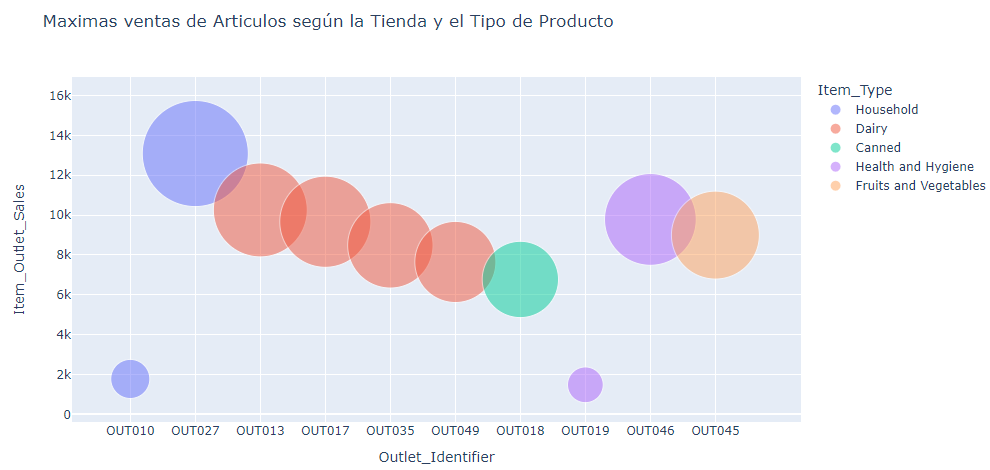